#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

#Read the Data

In [ ]:
df=pd.read_csv('/content/collegePlace.csv')

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1.0,8.0,1.0,1.0,1.0
1,21,Female,Computer Science,0.0,7.0,1.0,1.0,1.0
2,22,Female,Information Technology,1.0,6.0,0.0,0.0,1.0
3,21,Male,Information Technology,0.0,8.0,0.0,1.0,1.0
4,22,Male,Mechanical,0.0,8.0,1.0,0.0,1.0


#Data Preparation

In [ ]:
df.shape

(2966, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2966 non-null   int64  
 1   Gender             2966 non-null   object 
 2   Stream             2966 non-null   object 
 3   Internships        2964 non-null   float64
 4   CGPA               2942 non-null   float64
 5   Hostel             2932 non-null   float64
 6   HistoryOfBacklogs  2939 non-null   float64
 7   PlacedOrNot        2950 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 185.5+ KB


#Replacing Null values

In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Stream                0
Internships           2
CGPA                 24
Hostel               34
HistoryOfBacklogs    27
PlacedOrNot          16
dtype: int64

In [ ]:
df['Internships']=df['Internships'].fillna(df['Internships'].mode()[0])
df['CGPA']=df['CGPA'].fillna(df['CGPA'].mode()[0])
df['Hostel']=df['Hostel'].fillna(df['Hostel'].mode()[0])
df['HistoryOfBacklogs']=df['HistoryOfBacklogs'].fillna(df['HistoryOfBacklogs'].mode()[0])
df['PlacedOrNot']=df['PlacedOrNot'].fillna(df['PlacedOrNot'].mode()[0])

In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

#checking outliers


In [ ]:
def out(feature):
  sns.boxplot(feature)

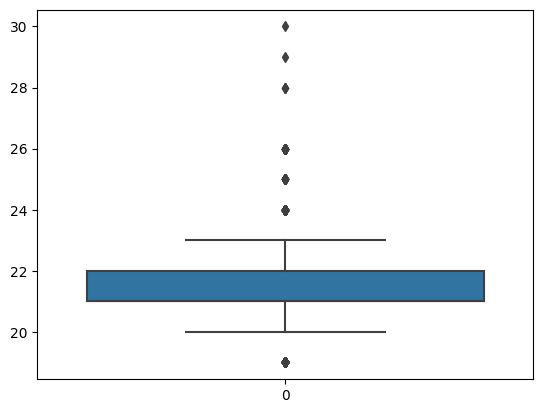

In [ ]:
out(df['Age'])

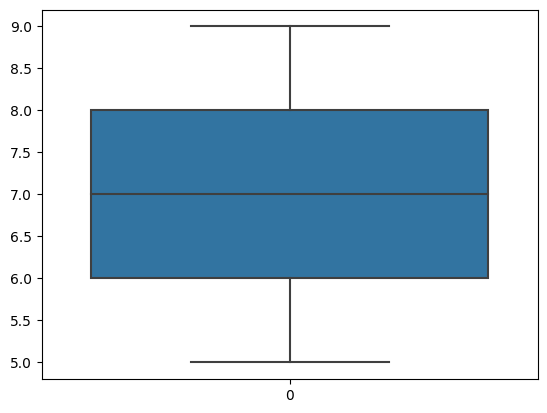

In [ ]:
out(df['CGPA'])

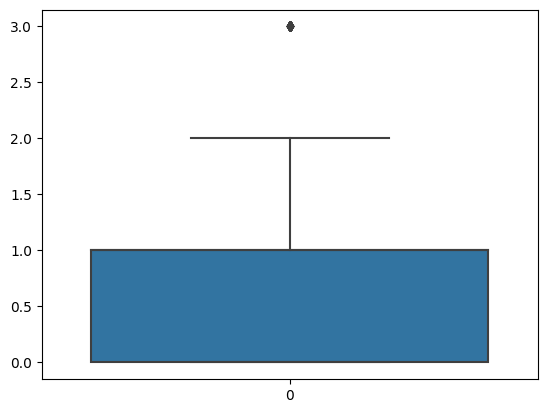

In [ ]:
out(df['Internships'])

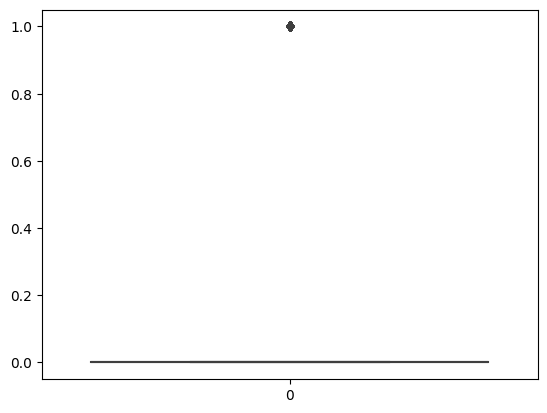

In [ ]:
out(df['HistoryOfBacklogs'])

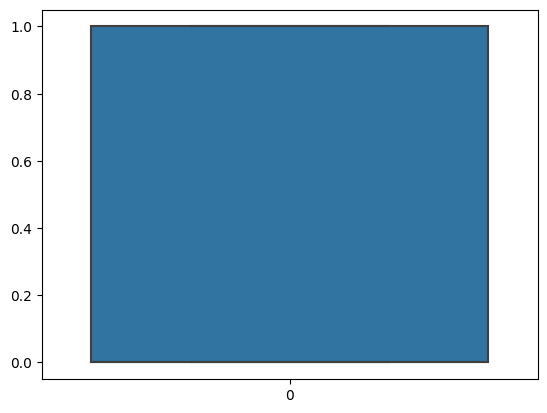

In [ ]:
out(df['Hostel'])

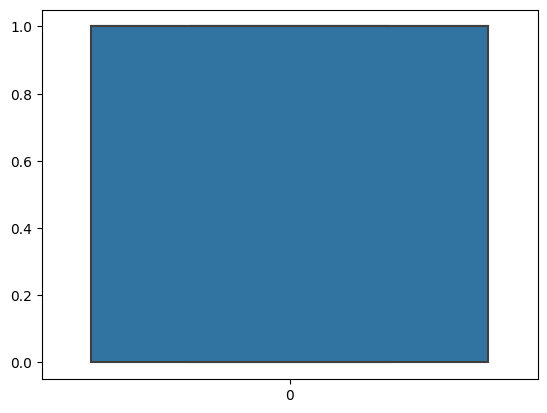

In [ ]:
out(df['PlacedOrNot'])

#Removing Outliers


In [ ]:
# Calculate the first and third quartiles of the age, internships, and HistoryOfBacklogs columns
age_q1 = df["Age"].quantile(0.25)
age_q3 = df["Age"].quantile(0.75)
internships_q1 = df["Internships"].quantile(0.25)
internships_q3 = df["Internships"].quantile(0.75)
backlogs_q1 = df["HistoryOfBacklogs"].quantile(0.25)
backlogs_q3 = df["HistoryOfBacklogs"].quantile(0.75)

age_iqr = age_q3 - age_q1
internships_iqr = internships_q3 - internships_q1
backlogs_iqr = backlogs_q3 - backlogs_q1

# Define the lower and upper bounds for outlier detection
age_lower_bound = age_q1 - 1.5 * age_iqr
age_upper_bound = age_q3 + 1.5 * age_iqr
internships_lower_bound = internships_q1 - 1.5 * internships_iqr
internships_upper_bound = internships_q3 + 1.5 * internships_iqr
backlogs_lower_bound = backlogs_q1 - 1.5 * backlogs_iqr
backlogs_upper_bound = backlogs_q3 + 1.5 * backlogs_iqr

# Remove rows with age, internships, or HistoryOfBacklogs values that fall outside the bounds
df_clean = df[(df["Age"] >= age_lower_bound) & (df["Age"] <= age_upper_bound) & 
              (df["Internships"] >= internships_lower_bound) & (df["Internships"] <= internships_upper_bound) &
              (df["HistoryOfBacklogs"] >= backlogs_lower_bound) & (df["HistoryOfBacklogs"] <= backlogs_upper_bound)]

# Save the cleaned data to a new CSV file
df_clean.to_csv("cleaned_data.csv", index=False)


In [ ]:
data=pd.read_csv('/content/cleaned_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2066 non-null   int64  
 1   Gender             2066 non-null   object 
 2   Stream             2066 non-null   object 
 3   Internships        2066 non-null   float64
 4   CGPA               2066 non-null   float64
 5   Hostel             2066 non-null   float64
 6   HistoryOfBacklogs  2066 non-null   float64
 7   PlacedOrNot        2066 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 129.2+ KB


In [ ]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

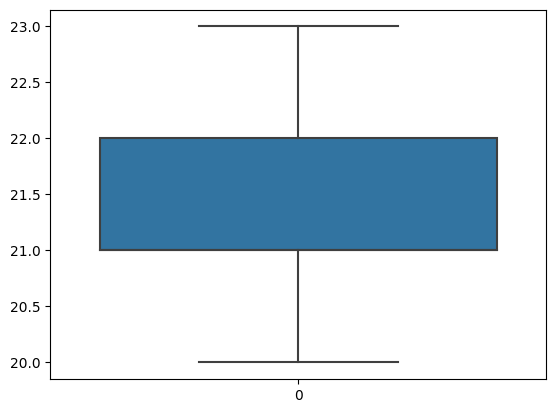

In [ ]:
out(data['Age'])

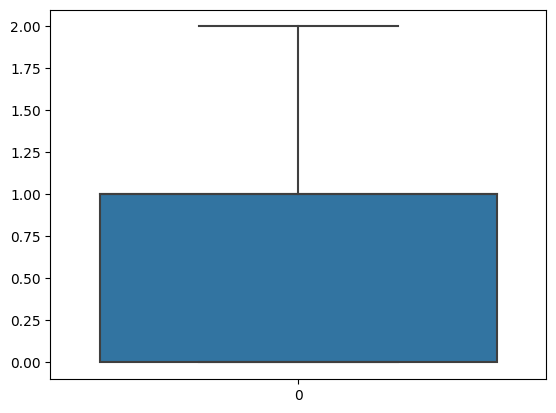

In [ ]:
out(data['Internships'])

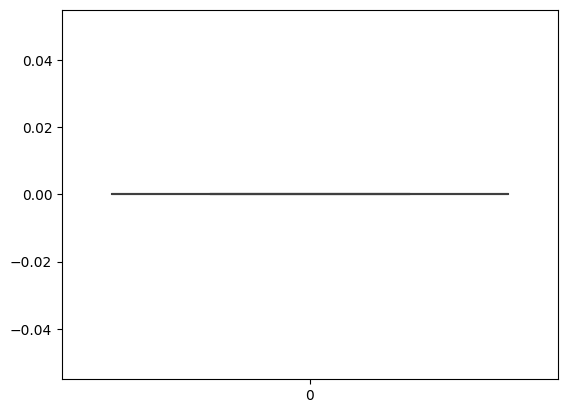

In [ ]:
out(data['HistoryOfBacklogs'])

# Handling Categorical values

In [ ]:
data['Gender']=data['Gender'].replace({'Male':1,'Female':0})

In [ ]:
data['Stream']=data['Stream'].replace({'Information Technology':0,'Mechanical':1,'Electronics And Communication':2, 'Computer Science':3, 'Civil':4,'Electrical':5})

In [ ]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1.0,6.0,0.0,0.0,1.0
1,22,1,1,0.0,8.0,1.0,0.0,1.0
2,22,1,2,0.0,6.0,0.0,0.0,1.0
3,21,1,0,1.0,7.0,0.0,0.0,1.0
4,21,1,3,2.0,6.0,0.0,0.0,1.0


# EDA

##Visual Analysis

##Univariate Analysis

###Histogram 

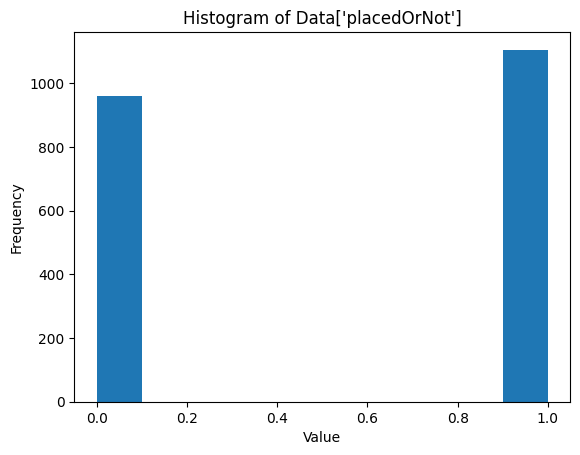

In [ ]:
plt.hist(data['PlacedOrNot'])
plt.title("Histogram of Data['placedOrNot']")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

###BoxPlot

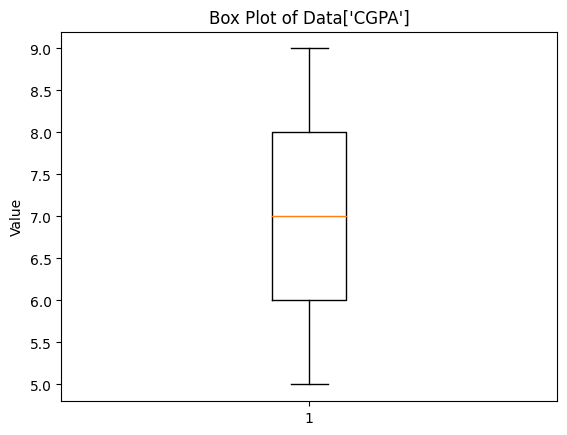

In [ ]:
plt.boxplot(data['CGPA'])
plt.title("Box Plot of Data['CGPA']")
plt.ylabel("Value")
plt.show()

###Kernel Density Plots

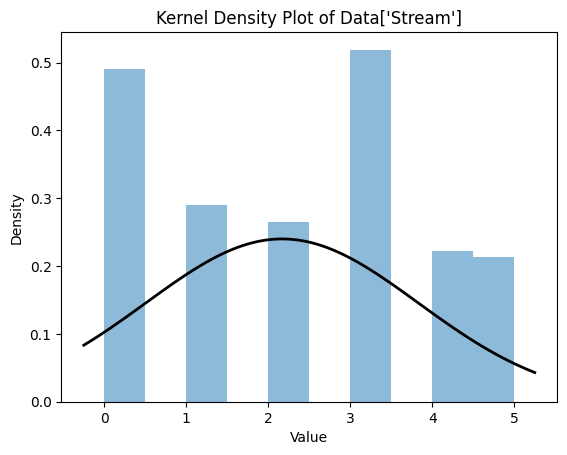

In [ ]:
plt.hist(data['Stream'], density=True, alpha=0.5)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(data['Stream']), np.std(data['Stream']))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Kernel Density Plot of Data['Stream']")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

###Bar Plot

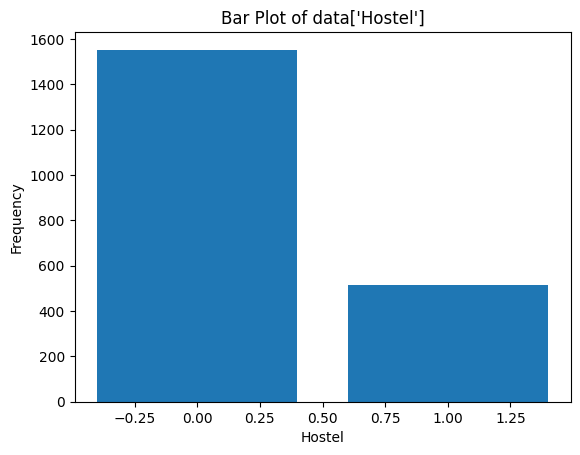

In [ ]:
hostel_counts = data['Hostel'].value_counts()
plt.bar(hostel_counts.index, hostel_counts.values)
plt.title("Bar Plot of data['Hostel']")
plt.xlabel("Hostel")
plt.ylabel("Frequency")
plt.show()

###pie chart 

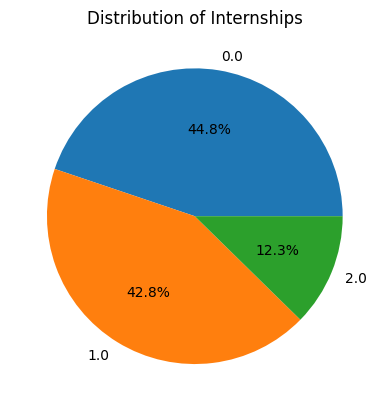

In [ ]:
counts = data['Internships'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Internships')
plt.show()

###Heat Map

<Axes: xlabel='col_0', ylabel='Gender'>

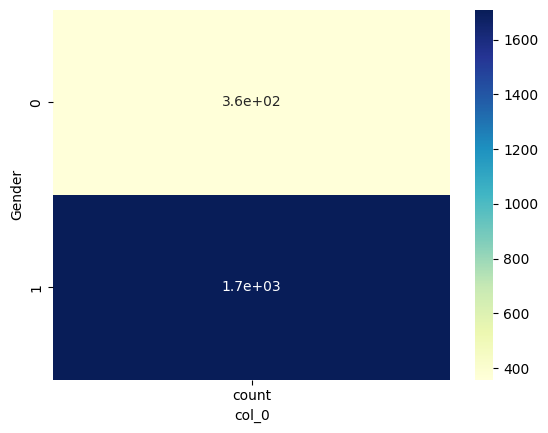

In [ ]:
freq_table = pd.crosstab(index=data['Gender'], columns='count')
sns.heatmap(freq_table, annot=True, cmap='YlGnBu')




##Bivariate Analysis

###Count Plot

<Axes: xlabel='PlacedOrNot', ylabel='count'>

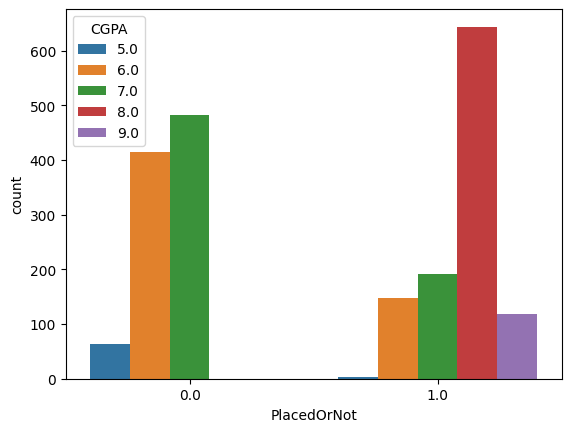

In [ ]:
sns.countplot(data=data,x=data['PlacedOrNot'],hue=data['CGPA'])

###Scatter plot

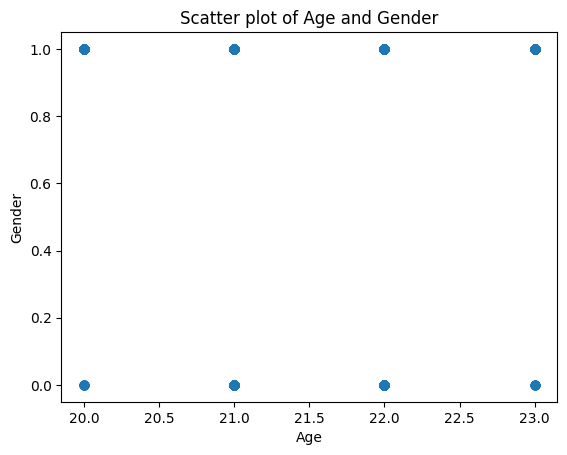

In [ ]:
plt.scatter(data['Age'], data['Gender'])
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Scatter plot of Age and Gender')

plt.show()

###Bubble Plot

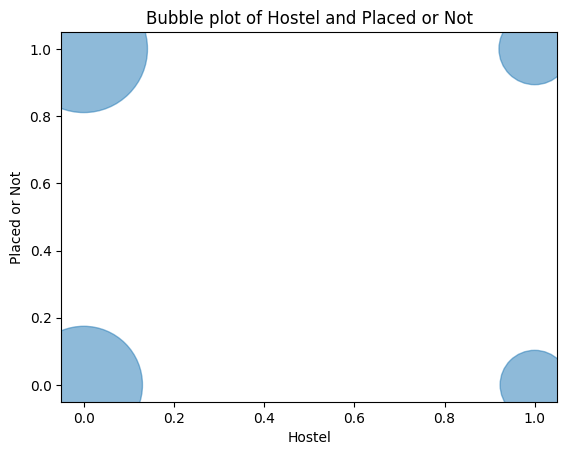

In [ ]:
grouped = data.groupby(['Hostel', 'PlacedOrNot']).size().reset_index(name='count')

# Create a bubble plot
plt.scatter(grouped['Hostel'], grouped['PlacedOrNot'], s=grouped['count']*10, alpha=0.5)

# Add axis labels and title
plt.xlabel('Hostel')
plt.ylabel('Placed or Not')
plt.title('Bubble plot of Hostel and Placed or Not')

# Display the plot
plt.show()

##Multiariate Analysis

###ScatterPlot

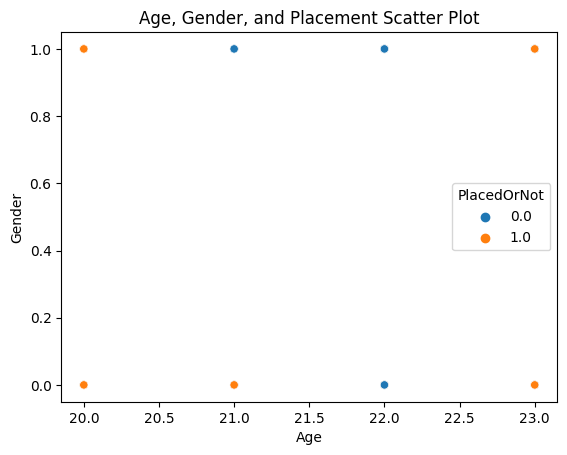

In [ ]:
sns.scatterplot(x='Age', y='Gender', hue='PlacedOrNot', data=data)

# add labels
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Age, Gender, and Placement Scatter Plot')
plt.show()


###Heat Map

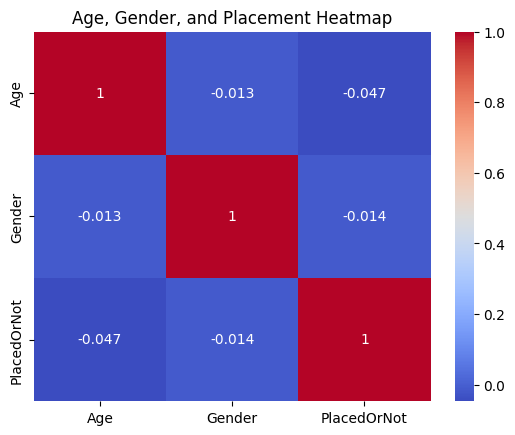

In [ ]:
# create the heatmap
sns.heatmap(data[['Age', 'Gender', 'PlacedOrNot']].corr(), annot=True, cmap='coolwarm')

# add title
plt.title('Age, Gender, and Placement Heatmap')
plt.show()


###Violin Plot

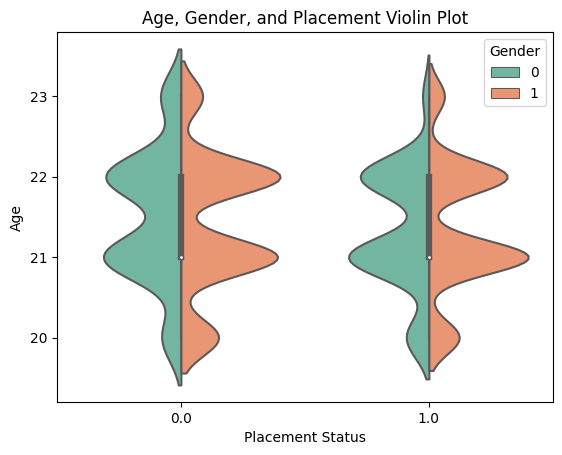

In [ ]:
# create the violin plot
sns.violinplot(x='PlacedOrNot', y='Age', hue='Gender', data=data, palette='Set2', split=True)

# add labels
plt.xlabel('Placement Status')
plt.ylabel('Age')
plt.title('Age, Gender, and Placement Violin Plot')
plt.show()


##Split the data set into train and test

In [ ]:
x=data.iloc[:,0:7]
y=data['PlacedOrNot'].to_frame()

In [102]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=0)

# Model Building

##SVM Algorithm

##Initialize SVM algorithm

In [ ]:
svc=SVC()

In [88]:
svc.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [89]:
ypred_svc=svc.predict(xtest)

###performance metrics

In [90]:
print(classification_report(ytest,ypred_svc))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        47
         1.0       0.90      0.77      0.83        57

    accuracy                           0.83       104
   macro avg       0.83      0.83      0.83       104
weighted avg       0.84      0.83      0.83       104



In [ ]:
confusion_matrix(ytest,ypred_svc)

array([[193,  11],
       [ 62, 148]])

###Testing SVM algorithm

In [ ]:
svc.predict([[29,0,3,3,8.5,1,0]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1.])

##KNN Algorithm

##Initialize KNN algorithm

In [ ]:
knn=KNeighborsClassifier()

In [103]:
knn.fit(xtrain,ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [104]:
ypred_knn=knn.predict(xtest)

###Performance Metrics

In [107]:
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85        94
         1.0       0.90      0.83      0.87       113

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207



In [ ]:
confusion_matrix(ytest,ypred_knn)

array([[184,  20],
       [ 50, 160]])

###Testing KNN Algorithm

In [70]:
knn.predict([[31,1,4,2,0,0,1]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.])

## ANN Algorithm

##Initialize ANN algorithm

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(7,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(xtrain,ytrain,batch_size=2,epochs=25,validation_data=(xtest,ytest))

Epoch 1/25
826/826 [==============================] - 5s 4ms/step - loss: 0.3071 - accuracy: 0.8747 - val_loss: 0.3607 - val_accuracy: 0.8551
Epoch 2/25
826/826 [==============================] - 2s 2ms/step - loss: 0.3189 - accuracy: 0.8656 - val_loss: 0.3574 - val_accuracy: 0.8502
Epoch 3/25
826/826 [==============================] - 2s 2ms/step - loss: 0.3076 - accuracy: 0.8741 - val_loss: 0.3678 - val_accuracy: 0.8551
Epoch 4/25
826/826 [==============================] - 2s 2ms/step - loss: 0.3064 - accuracy: 0.8753 - val_loss: 0.4498 - val_accuracy: 0.8237
Epoch 5/25
826/826 [==============================] - 2s 2ms/step - loss: 0.3084 - accuracy: 0.8723 - val_loss: 0.3746 - val_accuracy: 0.8237
Epoch 6/25
826/826 [==============================] - 2s 3ms/step - loss: 0.3062 - accuracy: 0.8723 - val_loss: 0.3630 - val_accuracy: 0.8502
Epoch 7/25
826/826 [==============================] - 3s 3ms/step - loss: 0.3028 - accuracy: 0.8747 - val_loss: 0.3672 - val_accuracy: 0.8527
Epoch 

###Testing ANN algorithm

In [ ]:
ann.predict([[24,0,4,3,9.9,1,0]])

1/1 [==============================] - 0s 145ms/step


array([[1.]], dtype=float32)

In [ ]:
x.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs'],
      dtype='object')

# Saving the Best Model

In [108]:
pickle.dump(knn,open('Placement_knn.pkl','wb'))

In [ ]:
x.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,0,0,1.0,6.0,0.0,0.0
1,22,1,1,0.0,8.0,1.0,0.0
2,22,1,2,0.0,6.0,0.0,0.0
3,21,1,0,1.0,7.0,0.0,0.0
4,21,1,3,2.0,6.0,0.0,0.0


In [ ]:
x['Stream'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)